## 5.1 합성곱 신경망
- 순전파 과정에 따라 계산된 오차 정보가 신경망의 모든 노드(출력층 -> 은닉층 -> 입력층)으로 전송됨. 계산과정이 복잡하며 많은 자원이 필요하므로 이 문제를 해결하는 합성곱 신경망이 등장
- 이미지 전체를 한번에 계산하는 것이 아니라 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약해 이미지의 세밀한 부분까지 분석 수행.

### 5.1.1 합성곱층의 필요성
- 이미지나 영성을 처리하는데 유용
- 3*3 배열을 오른쪽과 같이 펼쳐서 각 픽셀의 가중치를 곱하여 은닉층으로 전달하는데 이 과정에서 공간적 구조를 무시하게 되어 이를 방지하기 위해 합성곱층을 도입.

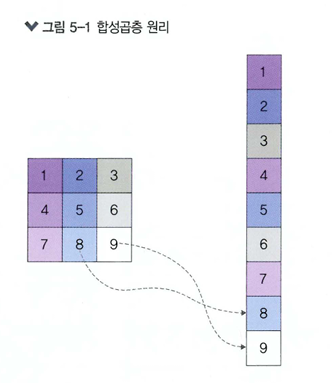

### 5.1.2 합성곱 신경망 구조
- 음성인식이나 이미지/영상 인식에서 주로 사용, 다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화되어 있으며 5개의 계층으로 구성

1. 입력층
2. 합성곱층
3. 풀링층
4. 완전연결층
5. 출력층

- 합성곱 신경망은 합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터를 추출 그후 추출된 주요 특성 벡터들은 완전 연결층을 거치면서 1차원 벡터로 변환되며, 마지막으로 출력층에서 활성화 함수인 소프트맥스 함수를 사용하여 최종 결과가 출력

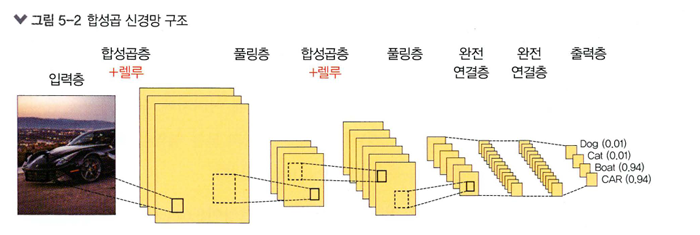

- 입력층: 입력 이미지 데이터가 최초로 거치게 되는 계층으로 단순 1차원의 데이터가 아닌 높이, 너비, 채널의 값을 갖는 3차원 데이터
  - 다음 그림과 같은 형태는 높이 4, 너비 4, 패널 RGB를 가지고 있음.

  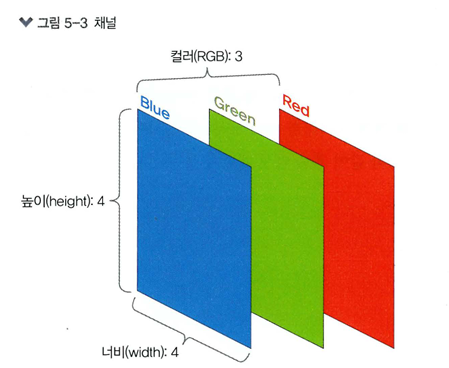

- 합성곱층: 입력 데이터에서 특성 추출하는 역할을 수행, 입력 이미지가 들어왔을 떄 이미지에 대한 특성을 감지하기 위해 커널이나 필터를 사용, 커널/필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데 이렇게 추출된 결과물이 특성맵이됨.
  - 스트라이드는 지정된 간격에 따라 순차적으로 이동하는 것을 의미
  1. 입력이미지에 3*3 필터 적용: 입력 이미지와 필터를 포개 높고 대응되는 숫자끼리 곱한 후 모두 더함.
  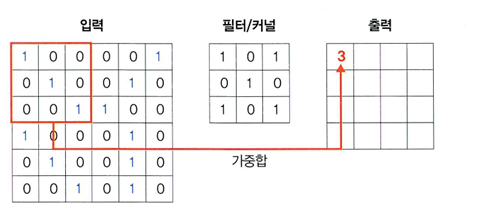

  2. 필터가 1만큼 이동:
  
   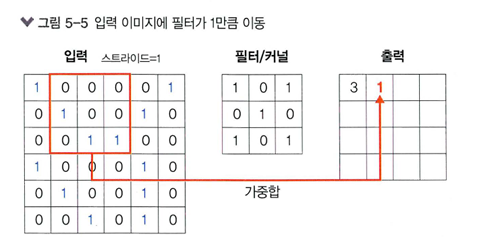

  3. 필터가 1만큼 두 번째 이동
  4. 필터가 1만큼 세 번째 이동
  5. 필터가 1만큼 네 번쨰 이동
  6. 필터가 1만큼 마지막 이동:
  
  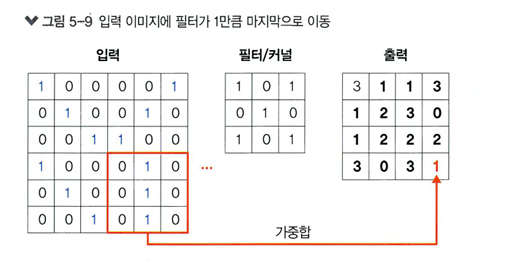

- 커널은 스트라이드 간격만큼 순회하면서 모든 입력 값과의 합성곱 연산으로 새로운 특성 맵을 만들게 되며, 앞의 그림과 같이 커널과 스트라이드 상호작용으로 원본(6,6,1), 크기가(4,4,1) 크기의 특성 맵으로 줄어듦.

- 컬러 이미지의 합성곱: 필터 채널이 3개가 되며 RGB 각각에 서로 다른 가중치로 합성곱을 적용한 후에 결과를 더하는 것

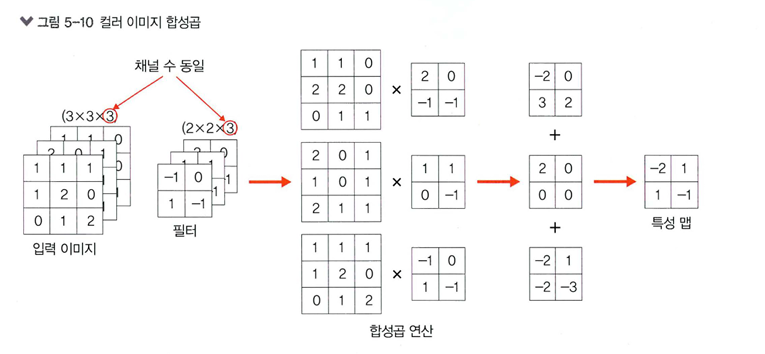


- 필터가 두개 이상인 합성곱의 형태:

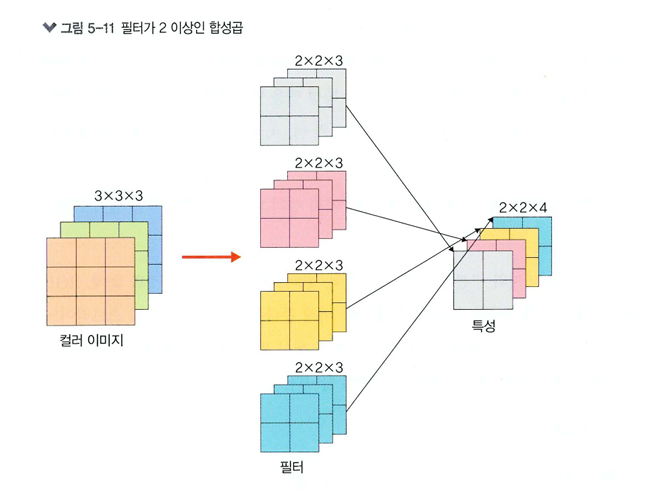

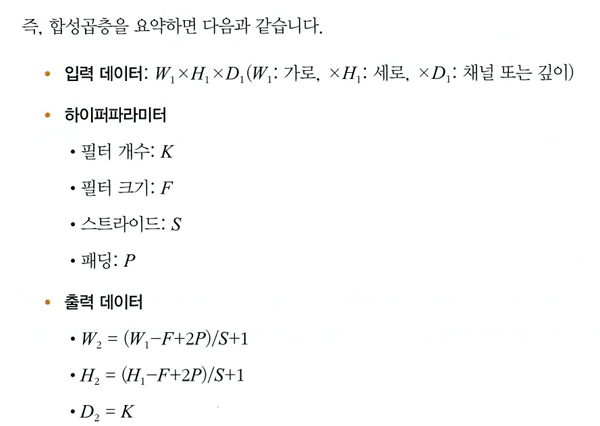

- 풀링층: 합성곱층과 유사하게 특성 맵 파원을 다운 샘플링하여 연산량을 감소시키고 주요 특성 벡터를 추출하여 학습을 효과적으로 하는 것
  - 풀링 연산 1: 최대 풀링(대상 영역에서 최댓값을 추출)
  - 풀링 연산 2: 평균 풀링(대상 영역에서 평균을 반환)
  -> 대부분의 합성곱 신경망에서는 최대 풀링 사용, 평균 풀링은 각 커널 값을 평균화 시켜 중요한 가중치를 갖는 값의 특성이 희미해짐.

  - 예시:
  
  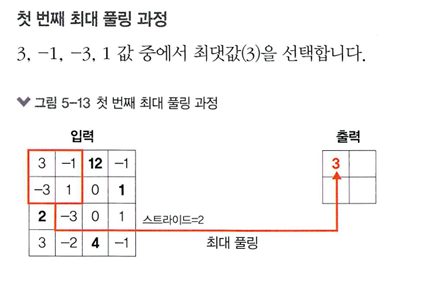

- 최대 풀링과 평균 풀링 결과 비교:

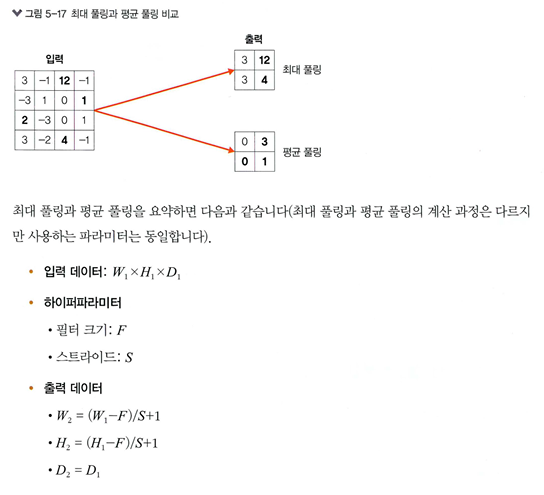

- 완전 연결층: 합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전연결층으로 전달됨. 이 과정에서 이미지는 3차원 벡터에서 1차원 벡터로 펼쳐짐.

- 출력층: 소프트맥스 활성화 함수가 사용, 입력받은 값을 0~1 사이의 값으로 출력, 따라서 마지막 출력층의 소프트 맥스 함수를 사용하여 이미지가 각 레이블에 속할 확률 값이 출력되며 이때 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정.



### 5.1.3 1D, 2D, 3D
- 1D 합성곱: 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱으로 입력(W)와 필터(K)에 대한 출력은 W가 된다.

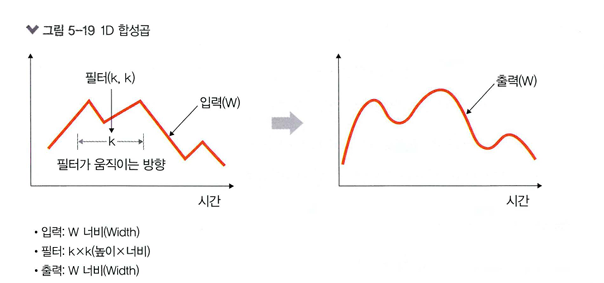

- 2D 합성곱: 필터가 그림과 같이 방향 두개로 움직이는 형태로 입력(W, H)와 필터(k, k)에 대한 출력은 (W,H)가 되며 출력 형태는 2D 행렬이 된다.

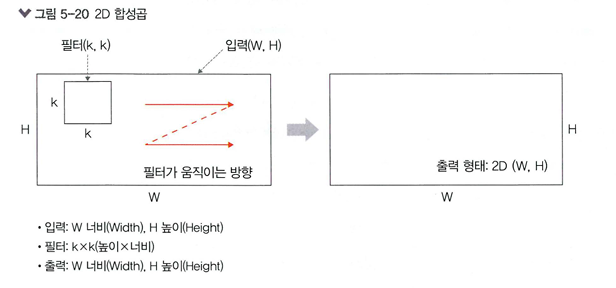

- 3D 합성곱: 입력(W,H,L)에 대해 필터(k,k,d)를 적용하면 출력을 (W,H,L)을 갖는 형태가 3D 합성곱이다. 출력은 3D 형태이며 d<L을 유지하는 것이 중요.

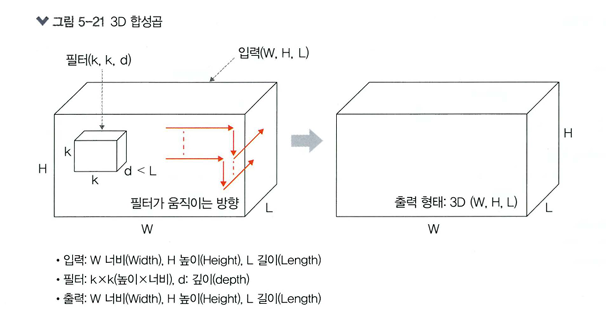

- 3D 입력을 갖는 2D 합성곱: 입력이 3D 현태임에도 출력 형태가 3D가 아닌 2D 행렬을 취하는 것이 '3D 입력을 갖는 2D 합성곱'이다. 필터에 대한 길이(L)가 입력 채널의 길이(L)와 같아야 하므로 이와 같은 합성곱 형태가 만들어져 입력(W, H, L)에 필터 (k, k, L)을 적용하면 출력은 (W, H)가 된다.
  - 필터는 다음 그림과 같이 두 방향으로 움직이며 출력 형태는 2D 행렬이 된다.

  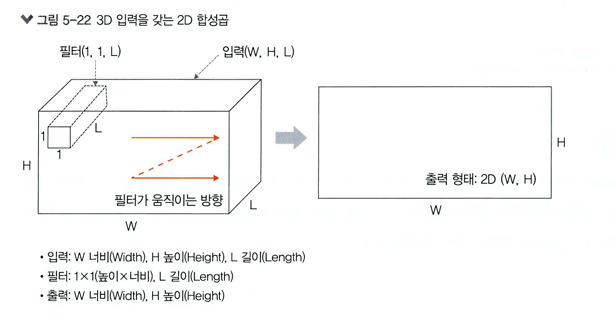

-  **1*1 합성곱**: 3D 형태로 입력되어 입력(W,H,L)에 필터 (1,1,L)을 적용하면 출력은 (W,H)가 된다. 1*1의 합성곱에서 채널수를 조정해서 연산량이 감소되는 효과라 있으며 대표적으로 GoogleNet이 있음.